Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [28]:
from random import random, seed
from itertools import product,accumulate
import numpy as np

from icecream import ic

from matplotlib import pyplot as plt

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [29]:
UNIVERSE_SIZE = 10_000
NUM_SETS = 1000
DENSITY = 0.3

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [30]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

## Helper Functions

In [31]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

## Have Fun!

In [32]:
# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)
valid(solution), cost(solution)

(np.True_, np.float64(6674695.329497039))

In [33]:
# A random solution with random 50% of the sets
solution = rng.random(NUM_SETS) < .5
valid(solution), cost(solution)

(np.True_, np.float64(3316780.468507696))

## Steepest Step 

In [34]:
def tweak(solution: np.ndarray) -> np.ndarray: #single mutation 
    new_sol = solution.copy()
    i = rng.integers(0, NUM_SETS)
    new_sol[i] = not new_sol[i]
    return new_sol

def multiple_mutations(solution: np.ndarray) -> np.ndarray: #multiple mutations
    mask = rng.random(NUM_SETS) < 0.01
    new_sol = np.logical_xor(solution,mask)
    return new_sol

In [35]:
# We need to also consider if the solution is valid
def fitness(solution: np.ndarray):
    return (valid(solution),-cost(solution))

# This uses the lexicografic order

ic| fitness(solution): (np.True_, np.float64(-6674695.329497039))
ic| fitness(solution): (np.True_, np.float64(-130748.22893030164))
ic| history.index(float(solution_fitness[1])): 9319



 total steps: 50000


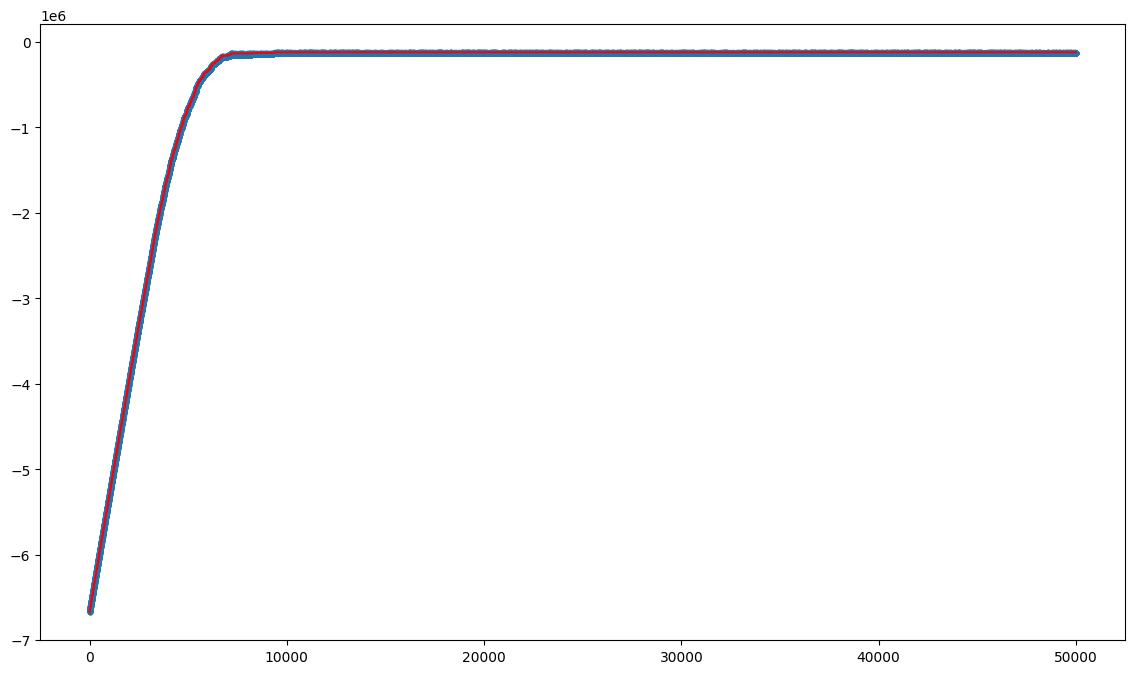

In [36]:
STEEPEST_STEP_CANDIDATES = 5
num_steps = 0
max_value = -1


solution = rng.random(NUM_SETS) < 1 

solution_fitness = fitness(solution)
history = [float( solution_fitness[1] )]

ic(fitness(solution))


for steps in range(10_000): 

    # using the small steps version of the tweak function produces better results
    candidates = [tweak(solution) for _ in range(STEEPEST_STEP_CANDIDATES)] 
    candidates_fitness = list()
    for c in candidates:
            f = fitness(c)
            history.append(float (f[1]))  
            candidates_fitness.append(f)
    idx = candidates_fitness.index(max(candidates_fitness)) # find the index of the best candidate

    # keep candidate solution that yielded the steepest ascent
    new_solution = candidates[idx] 
    
    f = candidates_fitness[idx]
    num_steps += STEEPEST_STEP_CANDIDATES


    # history.append(float(f[1]))
    
    if f > solution_fitness:
        solution = new_solution
        solution_fitness = fitness(solution)

   
ic(fitness(solution))
ic(history.index(float(solution_fitness[1]))) # number of steps to reach the best solution
print(f"\n total steps: {num_steps}")


plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")